# Машинное обучение, DS-поток
## Домашнее задание 5

**Правила:**

* Дедлайн **20 марта 02:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[ml] Фамилия Имя - задание 5"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `5.N.ipynb` и `5.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Теоретические задачи необходимо оформить в техе/markdown или же прислать фотку в правильной ориентации рукописного решения, **где все четко видно**.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  1 балл
* Задача 2 -  1 балл
* Задача 3 -  3 балла
* Задача 4 -  1 балл
* Задача 5 -  7 баллов

## Теория


 Рассмотрим задачу бинарной классификации, причем $\mathscr{Y} = \{+1, -1\}$. Пусть так же $\widehat{y}$ --- некоторый классификатор, предсказывающий степень принадлежности классу. При этом решающее правило имеет вид 
 $f(x) = \text{sign}\left(\widehat{y}(x)\right)$.
Рассмотрим логистическую функцию потерь:
$$\mathcal{L}(y, z) = \log \big(1 + \exp(-yz) \big)$$

### Задача 1
 Покажите, что задача минимизации функционала ошибки $Q(\widehat{y}) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, \widehat{y}(x_i)\right)$ для логистической функции потерь эквивалентна максимизации по $y$ функции правдоподобия в предположении $Y_i \sim Bern(\sigma(y(x)))$. 

### Задача 2
Рассмотрим градиентный бустинг с логистической функцией потерь. Выпишите для градиентного спуска формулу для вектора сдвигов и задачу поиска новой базовой модели. 


### Задача 3
 Предположим, модель градиентного бустинга $\widehat{y}_{t - 1}$ уже построена.
1. Выпишите вид функционала ошибки $Q(\widehat{y}_t) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, \widehat{y}_t(x_i)\right)$ для логистической функции потерь. Одинаковый ли вклад вносят разные объекты в ошибку?
2. Выпишите формулу для вектора сдвигов. Как она выражается через отклики на объектах обучающей выборки? Одинаковый ли вклад вносят разные объекты в формирование вектора сдвигов?
3.  На лекции было показано, что для экспоненциальной функции есть проблема: базовый классификатор может настраиваться только на шумовые объекты. Наблюдается ли такая проблема у логистической функции потерь?



### Задача 4
  Рассмотрим градиентный бустинг над решающими деревьями. После построения дерева выполняется делать перенастройку в листьях дерева.
1. Выпишите оптимизационную задачу для коэффициентов $\gamma_{tj}$ --- новых ответов в листьях.
2. Решите полученную задачу сделав один шаг метода Ньютона из начального приближения $\gamma_{tj} = 0$, что соответствует отсутствию базовой модели $b_t$.
 

## Практика

### Задача 5

*Внимание!* Перед выполнением задачи прочитайте полностью условие. В задаче используются смеси различных моделей с разными гиперпараметрами. Подумайте над тем, какой гиперпараметр как подбирать и на каком множестве. Не забудьте, что на тестовой выборке, по которой делаются итоговые выводы, ничего не должно обучаться.

**1.** Повторите исследование, проведенное в задаче 2 предыдущего домашнего задания, используя градиентный бустинг из `sklearn`. Сравните полученные результаты со случайным лесом. Детали:
* В качестве основы можно использовать как свое решение предыдущего задания, так и выложенное на Вики. В большинстве случаев нужно только заменить `RandomForestRegressor` на `GradientBoostingRegressor`.
* У градиентного бустинга есть также важный гиперпараметр `learning_rate`. Поясните его смысл и проведите аналогичные исследования.
* При сравнении методов по одинаковым свойствам желательно рисовать результаты на одном графике.
* Обратите внимание на метод `staged_predict` у `GradientBoostingRegressor`. Он позволяет получить "кумулятивные" предсказания, то есть по первым $t$ деревьям по всем значениям $t$.
* При кросс-валидации проводите достаточное количество итераций рандомизированного поиска (при $\geqslant 2$ параметров) на большой сетке параметров. Даже если долго обучается.

**2.** Выберите самый значимый признак согласно `feature_importances_` и визуализируйте работу первых 10 деревьев на графиках зависимости таргета от этого признака. Пример графиков смотрите в лекции.

**3.** Обучите градиентный бустинг на решающих деревьях, у которого в качестве инициализирующей модели используется линейная регрессия. Для этого используйте класс `GradientBoostingRegressor`, которому при инициализации в качестве параметра `init` передайте модель ридж-регрессии Ridge, которая должна быть инициализирована, но необучена. Подберите оптимальные гиперпараметры такой композиции. Как вы будете подбирать гиперпараметр ридж-регрессии? Улучшилось ли качество модели на тестовой выборке?

**4.** Рассмотрим модели смеси градиентного бустинга $\widehat{y}_{gb}$ и случайного леса $\widehat{y}_{rf}$ в виде
$$\widehat{y}(x) = w \widehat{y}_{gb}(x) +  (1-w) \widehat{y}_{rf}(x),$$
где $w \in [0, 1]$ --- коэффициент усреднения. Подберите оптимальное значение гиперпараметра $w$. Удалось ли добиться улучшения качества на тестовой выборке?

### Решение

#### Заимпортируем необходимые библиотеки

In [132]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm import tqdm

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

#### 1.  

Проведем эксперимент, аналогичный тому, что делали в прошлом дз

В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии.  

В качестве данных возьмём датасет `california_housing` из библиотеки `sklearn` о стоимости недвижимости в различных округах Калифорнии. Этот датасет состоит из 20640 записей и содержит следующие признаки для каждого округа: `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`, `Latitude`, `Longitude`. `HouseAge` и `Population` - целочисленные признаки. Остальные признаки - вещественные.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

Получим данные

In [2]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

Разделим на `train` и `test`

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Посмотрите, как изменяется качество бустинга в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию.

In [8]:
def get_test_mse(param_name, grid):
    test_mse = []
    for param_value in tqdm(grid):
        estimator = GradientBoostingRegressor(**{param_name: param_value})
        estimator.fit(X_train, y_train)
        test_mse.append(mse(y_test, estimator.predict(X_test)))
    return test_mse

def plot_mse_dependence(param_name, grid=range(1, 101), title=''):
    plt.figure(figsize=(12, 6))
    test_mse = get_test_mse(param_name, grid)
    plt.plot(grid, test_mse, label='test', lw=3)
    plt.legend(fontsize=14)
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    plt.title(title, fontsize=20)
    plt.show()

100%|██████████| 100/100 [03:01<00:00,  1.81s/it]


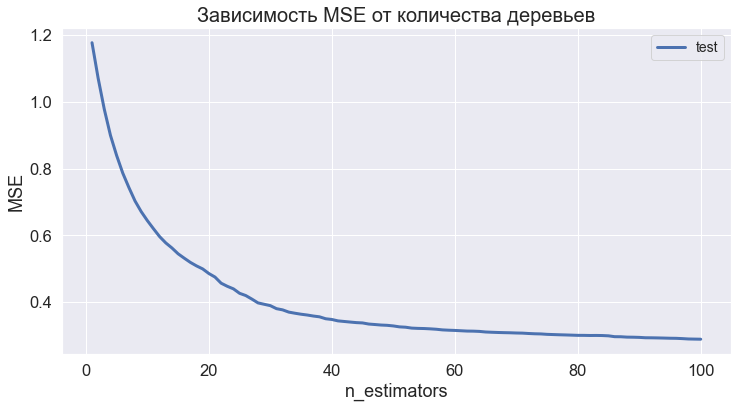

In [5]:
plot_mse_dependence('n_estimators', range(1, 101), title='Зависимость MSE от количества деревьев')

100%|██████████| 22/22 [04:21<00:00, 11.91s/it]


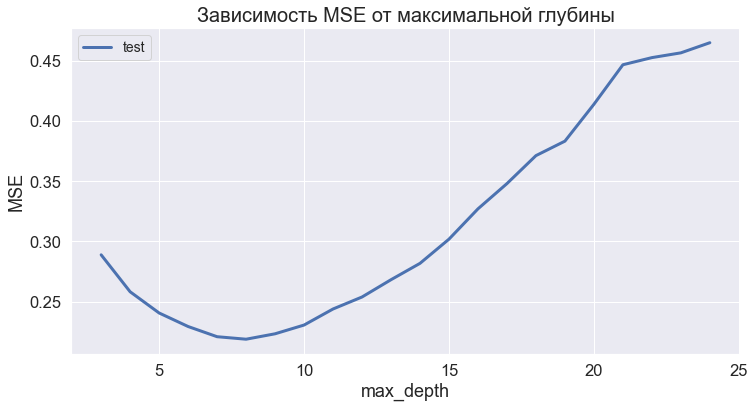

In [6]:
plot_mse_dependence('max_depth', range(3, 25), title='Зависимость MSE от максимальной глубины')

In [9]:
plot_mse_dependence('learning_rate', np.linspace(0.0001, 2, 20),
                    title='Зависимость MSE от максимальной глубины')

100%|██████████| 20/20 [01:14<00:00,  3.70s/it]


Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров при достаточно больших значениях параметров?

3. Решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для градиентного бустинга? Поясните свой ответ, опираясь на своё знание статистики.

Ответы  

1. Видно, что от увеличения количества деревьев MSE не начинает увеличиваться, но при это увеличение глубины деревьев в какой-то момент приводит к резкому скачку значения ошибки. Это связано с тем, что при большой глубине каждое из получившихся деревьев будет переобученным, поэтому на тестовых данных каждое дерево будет сильно ошибаться, ошибки от каждого из деревьев будут наслаиваться, и получится достаточно плохо. Как видно, lr же при одинаковом количестве деревьев нужен и не слишком маленький (не воспроизведем зависимости) и не слишком большой (не сможем достигнуть минимума из-за скачков)

2. При увеличении количества деревьев все стабилизируется, при увеличении максимальной глубины - ошибка возрастает, т.к. деревья становятся все более переобученными. lr же при большом значении не предвещает ничего хорошего.

3. Да, справедливо. Т.к. разброс при сложении наших деревьев не будет уменьшаться, а глубокие деревья имеют высокий разброс.

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какие параметры у них будут. Подберем оптимальные значения `max_depth`, `n_estimators` и `lr` с помощью кросс-валидации. Т.к. сетка получается из 3 параметров, то используем рандомный гридсерч.

In [15]:
gb_gridsearch = RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                                        param_distributions={'max_depth': np.array(np.arange(3, 10)),
                                                    'n_estimators': np.arange(10, 100),
                                                     'learning_rate': sps.uniform(loc=0, scale=5)},
                                        scoring='neg_mean_squared_error',
                                        verbose=10,
                                        n_jobs=-1,
                                        n_iter=200)

gb_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                          

Выведите найденные оптимальные параметры.

In [16]:
print('Наилучшие параметры: ', gb_gridsearch.best_params_)

Наилучшие параметры:  {'learning_rate': 0.14862920917972644, 'max_depth': 8, 'n_estimators': 58}


Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [17]:
max_depth = gb_gridsearch.best_params_['max_depth']
n_estimators = gb_gridsearch.best_params_['n_estimators']
lr = gb_gridsearch.best_params_['learning_rate']

Оценим качество предсказаний оптимальной модели

In [18]:
model = GradientBoostingRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=lr)
model.fit(X_train, y_train)
print('MSE gb с оптимальными параметрами на тесте: ' + \
      str(mse(y_test, model.predict(X_test))))

MSE gb с оптимальными параметрами на тесте: 0.22426452717365403


Исследуйте зависимость метрики `mse` от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

In [19]:
def get_test_train_mse(param_name, grid):
    train_mse, test_mse = [], []
    for param_value in tqdm(grid):
        estimator = GradientBoostingRegressor(**{param_name: param_value,
                                             'max_depth': max_depth,
                                             'n_estimators': n_estimators,
                                             'learning_rate': lr})
        estimator.fit(X_train, y_train)
        train_mse.append(mse(y_train, estimator.predict(X_train)))
        test_mse.append(mse(y_test, estimator.predict(X_test)))
    return train_mse, test_mse

def plot_test_train_mse_dependence(param_name, grid=range(1, 101), title=''):
    plt.figure(figsize=(12, 6))
    train_mse, test_mse = get_test_train_mse(param_name, grid)
    plt.plot(grid, test_mse, label='test', lw=3)
    plt.plot(grid, train_mse, label='train', lw=3)
    plt.legend(fontsize=14)
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    plt.title(title, fontsize=20)
    plt.show()

Постройте график зависимости метрики mse на test и train в зависимости от числа признаков, использующихся при разбиении в каждой вершине.

100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


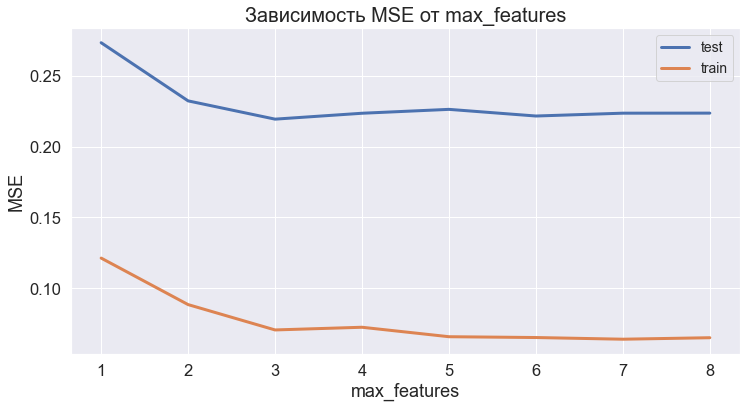

In [20]:
plot_test_train_mse_dependence('max_features', np.arange(1, 9), title='Зависимость MSE от max_features')

***Вывод.***  
В сравнении с случайным лесом градиентный бустинг показал лучший скор.  
Но при этом они работают по-разному: случайный лес работает на переобученных деревьях, и за счет уменьшения разброса посредством уменьшения корреляции все получается; градиентный бустинг же пытается каждой новой моделью приблизить остатки, работает на недообученных деревьях.  
В данной задаче это наоборот помогло.  
Также у GB есть параметр LR, который определяет насколько сильно мы доверяем каждой новой модели, т.е. насколько большой шаг мы делаем при минимизации остатков. Чем меньше он, тем ближе мы подойдем к минимуму, однако тогда потребуется больше деревьев.

#### 2.  

Выберите самый значимый признак согласно feature_importances_ и визуализируйте работу первых 10 деревьев на графиках зависимости таргета от этого признака. Пример графиков смотрите в лекции.

Получим номер самого значимого признака

In [21]:
feature = np.argmax(gb_gridsearch.best_estimator_.feature_importances_)

Обучим на этом признаке бустинг

In [45]:
X_cut = X[:, feature] # взяли только самый важный признак, получили обрезанную выборку

gb_gridsearch = RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                                        param_distributions={'max_depth': np.array(np.arange(3, 10)),
                                                    'n_estimators': [10],
                                                     'learning_rate': sps.uniform(loc=0, scale=5)},
                                        scoring='neg_mean_squared_error',
                                        verbose=10,
                                        n_jobs=-1,
                                        n_iter=200)

gb_gridsearch.fit(np.expand_dims(X_cut, axis=-1), y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1584s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 300 tas

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                          

Возьмем лучшую модель

In [62]:
model = gb_gridsearch.best_estimator_

Функции для визуализации

In [118]:
def draw_dependency(model, X, y):
    y_staged = model.staged_predict(np.expand_dims(X, axis=-1))
    
    for i in range(5):
        
        plt.figure(figsize=(20, 5))
        plt.subplot(1, 2, 1)
        
        plt.scatter(X, y, label='Истинные y')
        plt.scatter(X, next(y_staged), s=40, label='Предсказания')
        plt.title('Предсказания первых {} деревьев'.format(2 * i + 1), fontsize=20)
        plt.legend()
        
        plt.subplot(1, 2, 2)
        
        plt.scatter(X, y, label='Истинные y')
        plt.scatter(X, next(y_staged), s=40, label='Предсказания')
        plt.title('Предсказания первых {} деревьев'.format(2 * i + 2), fontsize=20)
        plt.legend()
        
        plt.show()
        

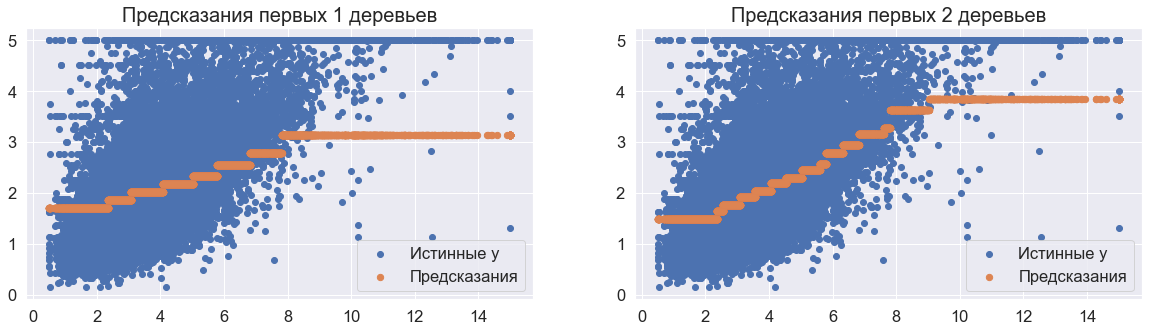

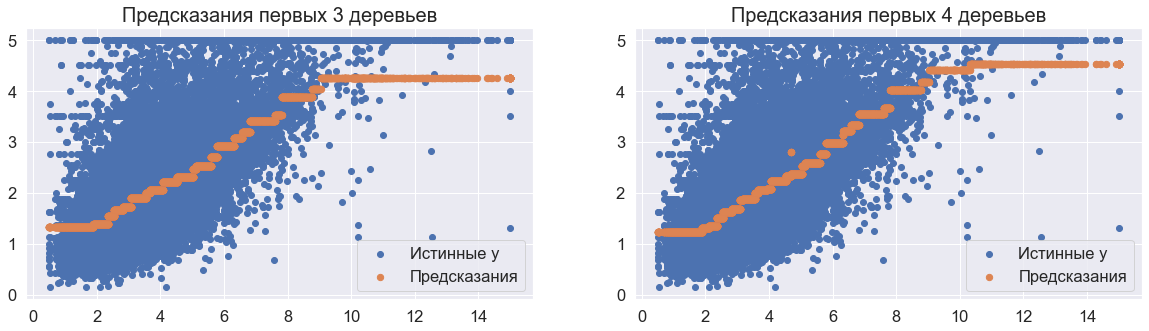

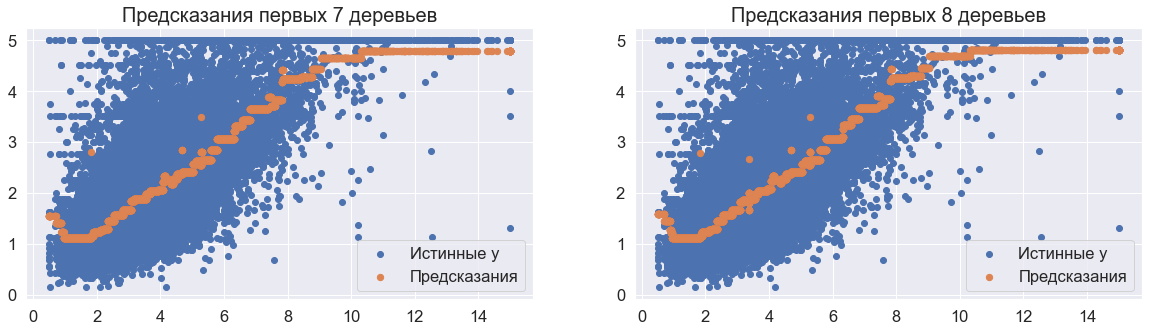

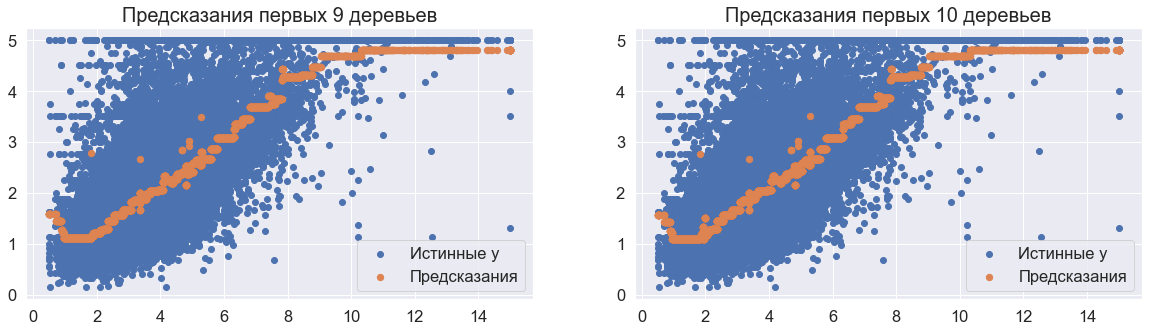

In [119]:
draw_dependency(model, X_cut, y)

Можно заметить, что с ростом номера дерева, каждое новое дерево предсказывает все более локально, при этом изменений для человеческого глаза почти не видно.  
Что вполне совпадает с той теорией про GB, которую мы изучили.  
Данное задание было только для визуализации, поэтому обучался на всем X.

#### 3.  

Обучите градиентный бустинг на решающих деревьях, у которого в качестве инициализирующей модели используется линейная регрессия. Для этого используйте класс `GradientBoostingRegressor`, которому при инициализации в качестве параметра `init` передайте модель ридж-регрессии Ridge, которая должна быть инициализирована, но необучена. Подберите оптимальные гиперпараметры такой композиции. Как вы будете подбирать гиперпараметр ридж-регрессии? Улучшилось ли качество модели на тестовой выборке?

Подберем гиперпараметры

In [127]:
pipeline = Pipeline([('scale', StandardScaler()),
                     ('clf', GradientBoostingRegressor(init=Ridge()))])

param_distributions={'clf__max_depth': np.array(np.arange(3, 10)),
                     'clf__n_estimators': np.arange(10, 101, 10),
                     'clf__learning_rate': sps.uniform(loc=0, scale=5),
                     'clf__init__alpha': np.linspace(0.0001, 1, 10)}

gb_gridsearch = RandomizedSearchCV(pipeline, param_distributions=param_distributions,
                                        scoring='neg_mean_squared_error',
                                        verbose=10,
                                        n_jobs=-1,
                                        n_iter=200)

gb_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scale',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('clf',
                                              GradientBoostingRegressor(alpha=0.9,
                                                                        ccp_alpha=0.0,
                                                                        criterion='friedman_mse',
                                                                        init=Ridge(alpha=1.0,
                                                                                   copy_X=True,
                                                                                   fit_intercept=True,
        

In [128]:
gb_gridsearch.best_params_

{'clf__init__alpha': 1.0,
 'clf__learning_rate': 0.17358009831256793,
 'clf__max_depth': 5,
 'clf__n_estimators': 100}

In [138]:
model_r = gb_gridsearch.best_estimator_
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-5.89176030e-01, -9.32173877e-01,  1.56404538e-03, ...,
        -2.14594131e-02,  2.41102758e-01, -4.01386647e-01],
       [ 1.36867697e+00,  3.38286839e-01,  9.40039621e-02, ...,
        -1.77486356e-02, -6.95557006e-01,  8.02121969e-01],
       [-5.67970132e-01, -7.73366288e-01,  9.69485145e-02, ...,
        -4.74092719e-02,  1.94582353e+00, -1.00064405e+00],
       ...,
       [-1.06847153e+00, -6.14558698e-01, -1.94762795e-02, ...,
        -5.38847245e-03,  1.97860662e+00, -1.32524181e+00],
       [ 3.88774576e-01,  1.00075454e-01,  3.24145653e-01, ...,
        -6.23152817e-02, -6.90873707e-01,  5.52431384e-01],
       [ 3.30009973e-01, -6.14558698e-01,  4.04525944e-01, ...,
        -2.22094878e-02,  8.73348098e-01, -6.21114361e-01]])

In [140]:
print('Результат модели с инициализацией : {}'.format(mse(y_test,
                                                          model_r.predict(X_test))))

Результат модели с инициализацией : 0.235422529537059


***Вывод***  
Как видно, подобная инициализация не улучшила score.  
В ridge-регрессии логично, что выбрался наибольший параметр, т.к. модели должны быть недообученными.

#### 4.  

Рассмотрим модели смеси градиентного бустинга $\widehat{y}_{gb}$ и случайного леса $\widehat{y}_{rf}$ в виде
$$\widehat{y}(x) = w \widehat{y}_{gb}(x) +  (1-w) \widehat{y}_{rf}(x),$$
где $w \in [0, 1]$ --- коэффициент усреднения. Подберите оптимальное значение гиперпараметра $w$. Удалось ли добиться улучшения качества на тестовой выборке?

Инициализируем класс новой модели

In [166]:
from sklearn.base import BaseEstimator

class GB_RF_Regr(BaseEstimator):

    def __init__(self, w=0.5, num_estim=100, max_depth=10):
        """
        Called when initializing the classifier
        """
        self.w = w
        self.num_estim = num_estim
        self.max_depth = max_depth
        self.gb = GradientBoostingRegressor(n_estimators=num_estim, max_depth=max_depth)
        self.rf = RandomForestRegressor(n_estimators=num_estim, max_depth=max_depth)


    def fit(self, X, y=None):

        self.gb.fit(X, y)
        self.rf.fit(X, y)

        return self
    
    def predict(self, X, y=None):
        
        return self.w * self.gb.predict(X) + (1 - self.w) * self.rf.predict(X)

In [168]:
gb_rf_gridsearch = RandomizedSearchCV(estimator=GB_RF_Regr(),
                                        param_distributions={'max_depth': np.array(np.arange(3, 10)),
                                                     'num_estim': np.arange(10, 101, 10),
                                                     'w': np.linspace(0, 1, 100)},
                                        scoring='neg_mean_squared_error',
                                        verbose=10,
                                        n_jobs=-1,
                                        n_iter=100)

gb_rf_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 11

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GB_RF_Regr(max_depth=10, num_estim=100, w=0.5),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'num_estim': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'w': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09...
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_sco

In [170]:
best_model = gb_rf_gridsearch.best_estimator_

In [171]:
mse(best_model.predict(X_test), y_test)

0.2766807941457074

Как видно, MSE стал больше, но это из-за слабого перебора в поиске по сетке :С